In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# DATA CLEANING AND FORMATION

In [4]:
import pandas as pd

df = pd.read_csv("genes.tsv", sep="\t")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Case                        1000 non-null   object 
 1   KRAS                        1000 non-null   float64
 2   ALK                         1000 non-null   float64
 3   EGFR                        1000 non-null   float64
 4   State                       980 non-null    object 
 5   Tobacco smoking status      932 non-null    object 
 6   Pack years smoked           635 non-null    object 
 7   Tobacco smoking onset year  429 non-null    object 
 8   Alcohol history             378 non-null    object 
 9   Tobacco smoking quit year   348 non-null    object 
 10  Alcohol intensity           329 non-null    object 
 11  Cigarettes per day          245 non-null    object 
 12  Years smoked                226 non-null    object 
 13  Alcohol days per week       0 non-

In [5]:
# Replacing "not informative" entries with actual NaN
missing_indicators = [
    "Not Reported", "Unknown", "Smoking history not documented", 
    "Duration Not Specified", "NaN", "nan", "", " "
]
df_cleaned = df.replace(missing_indicators, np.nan)

#  Saving the cleaned data to a new TSV file
df_cleaned.to_csv("genes_cleaned.tsv", sep="\t", index=False)

# Counting and displaying unique values per column
for col in df_cleaned.columns:
    print(f"\n--- {col} ---")
    print(df_cleaned[col].value_counts(dropna=False))


--- Case ---
Case
TCGA-49-6761    1
C3N-02285       1
C3N-03425       1
C3L-04013       1
TCGA-MP-A4TF    1
               ..
C3N-00555       1
C3N-02828       1
CDDP-ACMK       1
C3N-02284       1
ER-ACGR         1
Name: count, Length: 1000, dtype: int64

--- KRAS ---
KRAS
-0.245754    2
-0.010940    2
-0.025529    2
 0.007189    2
-0.182854    2
            ..
 0.708281    1
-0.896557    1
-0.216921    1
-0.153087    1
-0.486470    1
Name: count, Length: 994, dtype: int64

--- ALK ---
ALK
-0.341325    9
-0.298280    4
-0.290062    3
-0.337982    3
-0.318479    3
            ..
-0.310818    1
-0.333176    1
-0.295634    1
-0.292290    1
 0.841914    1
Name: count, Length: 889, dtype: int64

--- EGFR ---
EGFR
-0.506139    2
 0.361936    1
 4.083988    1
 4.097055    1
-0.590008    1
            ..
 0.669001    1
 1.465800    1
 1.167237    1
 1.250439    1
-0.450463    1
Name: count, Length: 999, dtype: int64

--- State ---
State
released    980
NaN          20
Name: count, dtype: int

In [6]:
import pandas as pd

df_cleaned = pd.read_csv("genes_cleaned.tsv", sep="\t") #load the dataset

for col in df_cleaned.columns:
    print(f"\n--- {col} ---")
    print(df_cleaned[col].value_counts(dropna=False))



--- Case ---
Case
TCGA-49-6761    1
C3N-02285       1
C3N-03425       1
C3L-04013       1
TCGA-MP-A4TF    1
               ..
C3N-00555       1
C3N-02828       1
CDDP-ACMK       1
C3N-02284       1
ER-ACGR         1
Name: count, Length: 1000, dtype: int64

--- KRAS ---
KRAS
-0.245754    2
-0.010940    2
-0.025529    2
 0.007189    2
-0.182854    2
            ..
 0.708281    1
-0.896557    1
-0.216921    1
-0.153087    1
-0.486470    1
Name: count, Length: 994, dtype: int64

--- ALK ---
ALK
-0.341325    9
-0.298280    4
-0.290062    3
-0.337982    3
-0.318479    3
            ..
-0.310818    1
-0.333176    1
-0.295634    1
-0.292290    1
 0.841914    1
Name: count, Length: 889, dtype: int64

--- EGFR ---
EGFR
-0.506139    2
 0.361936    1
 4.083988    1
 4.097055    1
-0.590008    1
            ..
 0.669001    1
 1.465800    1
 1.167237    1
 1.250439    1
-0.450463    1
Name: count, Length: 999, dtype: int64

--- State ---
State
released    980
NaN          20
Name: count, dtype: int

In [7]:
df_cleaned = df_cleaned.drop(columns=['Alcohol days per week'])
df_cleaned = df_cleaned.drop(columns=['Pack years smoked'])
df_cleaned = df_cleaned.drop(columns=['Tobacco smoking onset year'])
df_cleaned = df_cleaned.drop(columns=['Tobacco smoking quit year'])
df_cleaned.to_csv("genes_cleaned_updated.tsv", sep="\t", index=False)
#dropping empty or non-informative columns(dropped 'pack years smoked' because majority of data was '<146(633/635)'2)


### Descriptive Statistics

In [8]:
df_cleaned[['KRAS', 'ALK', 'EGFR']].describe()


,KRAS,ALK,EGFR
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.421085e-17,1.989520e-16,6.536993e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-8.965574e-01,-3.413251e-01,-5.900076e-01
25%,-3.445697e-01,-3.004397e-01,-3.928282e-01
50%,-1.843959e-01,-2.201315e-01,-2.224310e-01
75%,7.223347e-02,-6.050782e-02,7.878515e-02
max,1.660211e+01,1.375237e+01,1.592624e+01


### Data Mapping

In [9]:
# Filtering out the uncertain smoking status
df_filtered = df_cleaned[df_cleaned['Tobacco smoking status'] != 'Current Reformed Smoker, Duration Not Specified'].copy()

# Smoking status mapping 
smoking_map = {
    'Lifelong Non-Smoker': 0,
    'Current Reformed Smoker for > 15 yrs': 1,
    'Current Reformed Smoker for < or = 15 yrs': 2,
    'Current Smoker': 3
}

# Cigarettes per day mapping
cigs_map = {
    '≤12': 0,
    '>12 to 24': 1,
    '>24 to 36': 2,
    '>36 to 48': 3,
    '>48': 4
}

# Years smoked mapping
years_map = {
    '≤14': 0,
    '>14 to 28': 1,
    '>28 to 42': 2,
    '>42 to 56': 3,
    '>56': 4
}

# Alcohol history mapping
alcohol_hist_map = {
    'No': 0,
    'Yes': 1
}

# Alcohol intensity mapping
alcohol_int_map = {
    'Lifelong Non-Drinker': 0,
    'Non-Drinker': 1,
    'Occasional Drinker': 2
}

# Apply tobacco mappings
df_filtered['tobacco_status_score'] = df_filtered['Tobacco smoking status'].map(smoking_map)
df_filtered['cigs_score'] = df_filtered['Cigarettes per day'].map(cigs_map)
df_filtered['years_smoked_score'] = df_filtered['Years smoked'].map(years_map)
df_filtered['tobacco_risk'] = df_filtered[['tobacco_status_score', 'cigs_score', 'years_smoked_score']].sum(axis=1, skipna=True)

# Apply alcohol mappings
df_filtered['alcohol_hist_score'] = df_filtered['Alcohol history'].map(alcohol_hist_map)
df_filtered['alcohol_int_score'] = df_filtered['Alcohol intensity'].map(alcohol_int_map)
df_filtered['alcohol_risk'] = df_filtered[['alcohol_hist_score', 'alcohol_int_score']].sum(axis=1, skipna=True)


In [10]:
df_filtered[['tobacco_risk', 'alcohol_risk']].describe()


,tobacco_risk,alcohol_risk
count,940.000000,940.000000
mean,2.169149,0.532979
std,2.068606,1.141705
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,10.000000,3.000000


In [11]:
df_cleaned = pd.read_csv("genes_risk_summary.tsv", sep="\t")
print(df_cleaned.columns.tolist())


['Case', 'KRAS', 'ALK', 'EGFR', 'tobacco_risk', 'alcohol_risk']


In [12]:
df_cleaned = pd.read_csv("genes_risk_summary.tsv", sep="\t")


In [13]:
df_selected = df_cleaned[['Case', 'KRAS', 'ALK', 'EGFR', 'tobacco_risk', 'alcohol_risk']]

df_selected.to_csv("genes_risk_summary.tsv", sep="\t", index=False)

# EXPLORATORY DATA ANALYSIS

### EGFR Expression by Tobacco Risk Score(Boxplot)

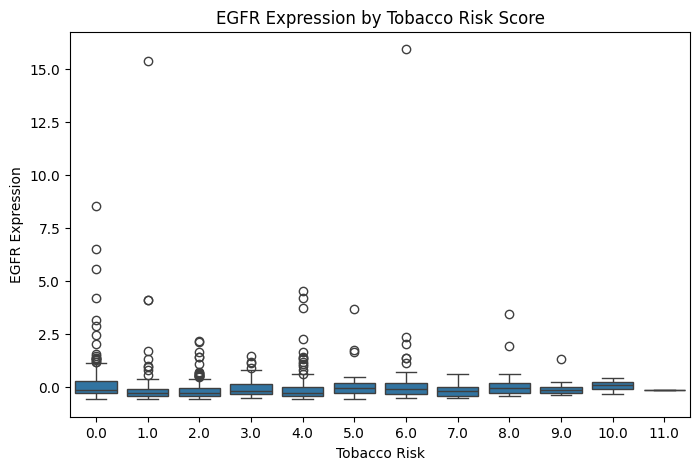

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# filtering out patients with missing tobacco_risk
tobacco_df = df_cleaned[df_cleaned['tobacco_risk'].notna()]

plt.figure(figsize=(8, 5))
sns.boxplot(x='tobacco_risk', y='EGFR', data=tobacco_df)
plt.title('EGFR Expression by Tobacco Risk Score')
plt.xlabel('Tobacco Risk')
plt.ylabel('EGFR Expression')
plt.show()


### KRAS Expression by Tobacco Risk Score(Boxplot)

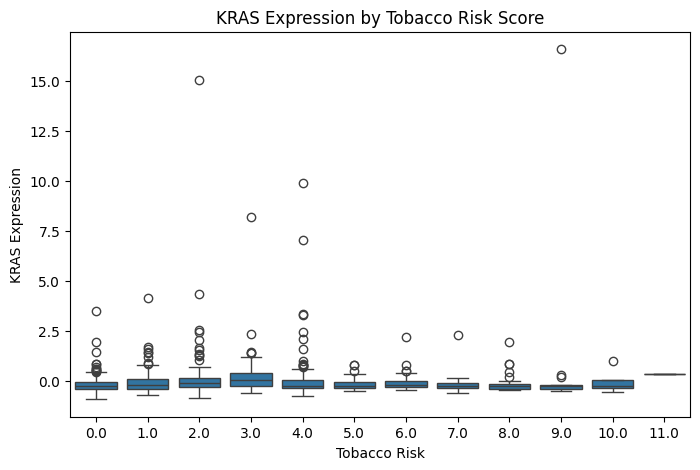

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# filtering out patients with missing tobacco_risk
tobacco_df = df_cleaned[df_cleaned['tobacco_risk'].notna()]

plt.figure(figsize=(8, 5))
sns.boxplot(x='tobacco_risk', y='KRAS', data=tobacco_df)
plt.title('KRAS Expression by Tobacco Risk Score')
plt.xlabel('Tobacco Risk')
plt.ylabel('KRAS Expression')
plt.show()


### ALK Expression by Tobacco Risk Score(Boxplot)

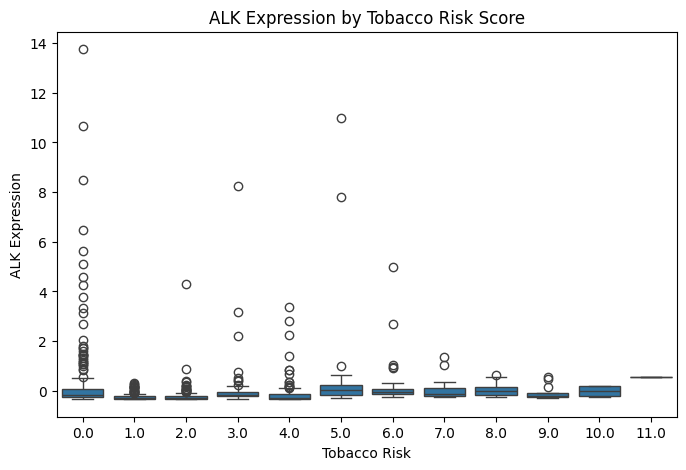

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# filtering out patients with missing tobacco_risk
tobacco_df = df_cleaned[df_cleaned['tobacco_risk'].notna()]

plt.figure(figsize=(8, 5))
sns.boxplot(x='tobacco_risk', y='ALK', data=tobacco_df)
plt.title('ALK Expression by Tobacco Risk Score')
plt.xlabel('Tobacco Risk')
plt.ylabel('ALK Expression')
plt.show()


### EGFR Expression By Alhocol Risk Score(Boxplot)

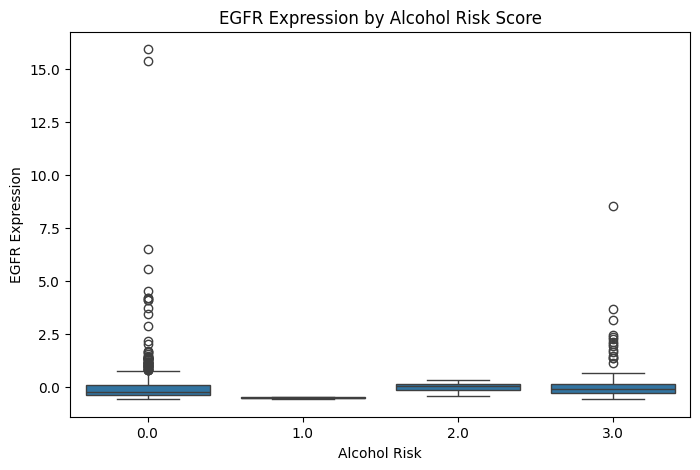

In [17]:
# filtering out patients with missing alcohol_risk
alcohol_df = df_cleaned[df_cleaned['alcohol_risk'].notna()]

plt.figure(figsize=(8, 5))
sns.boxplot(x='alcohol_risk', y='EGFR', data=alcohol_df)
plt.title('EGFR Expression by Alcohol Risk Score')
plt.xlabel('Alcohol Risk')
plt.ylabel('EGFR Expression')
plt.show()


### KRAS Expression By Alhocol Risk Score(Boxplot)

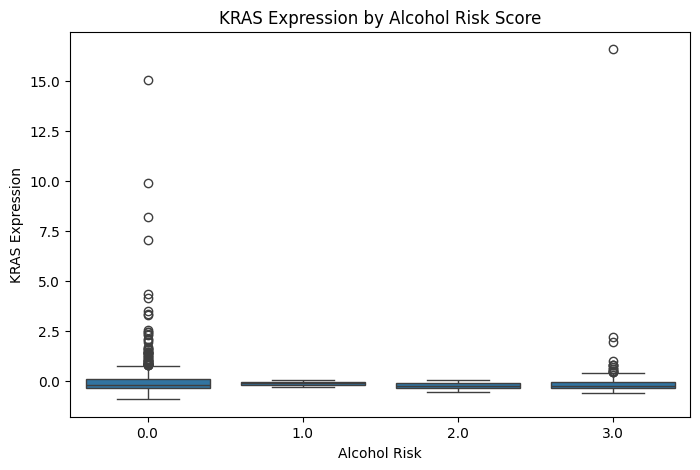

In [18]:
# filtering out patients with missing alcohol_risk
alcohol_df = df_cleaned[df_cleaned['alcohol_risk'].notna()]

plt.figure(figsize=(8, 5))
sns.boxplot(x='alcohol_risk', y='KRAS', data=alcohol_df)
plt.title('KRAS Expression by Alcohol Risk Score')
plt.xlabel('Alcohol Risk')
plt.ylabel('KRAS Expression')
plt.show()


### ALK Expression By Alhocol Risk Score(Boxplot)

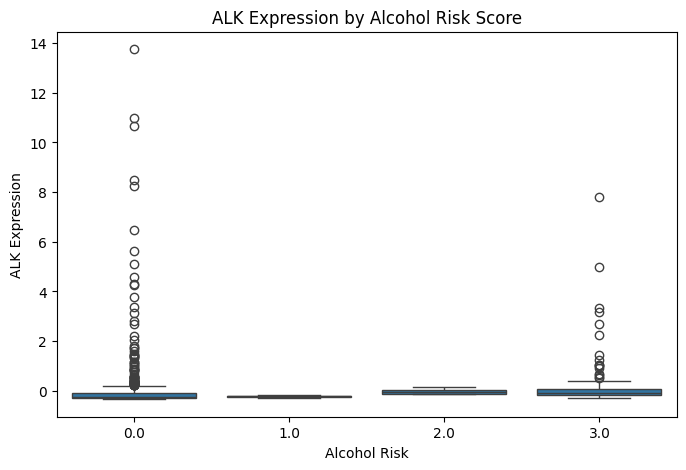

In [19]:
# filtering out patients with missing alcohol_risk
alcohol_df = df_cleaned[df_cleaned['alcohol_risk'].notna()]

plt.figure(figsize=(8, 5))
sns.boxplot(x='alcohol_risk', y='ALK', data=alcohol_df)
plt.title('ALK Expression by Alcohol Risk Score')
plt.xlabel('Alcohol Risk')
plt.ylabel('ALK Expression')
plt.show()


### Grouped Boxplot of Gene Expression by Tobacco Risk:

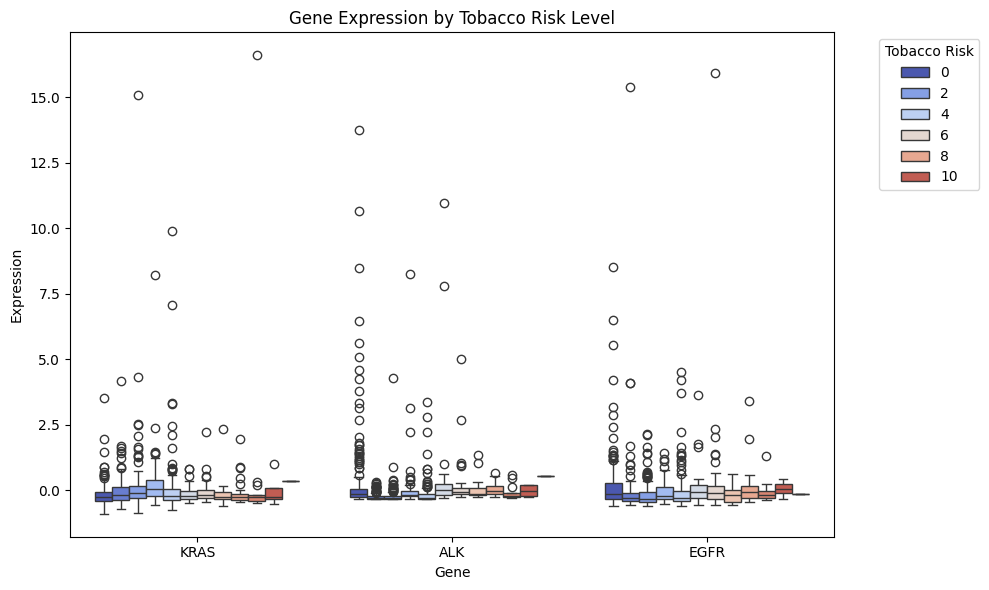

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melting for tobacco
tobacco_melted = tobacco_df.melt(id_vars='tobacco_risk', value_vars=['KRAS', 'ALK', 'EGFR'],
                                  var_name='Gene', value_name='Expression')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gene', y='Expression', hue='tobacco_risk', data=tobacco_melted, palette='coolwarm')
plt.title('Gene Expression by Tobacco Risk Level')
plt.legend(title='Tobacco Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Grouped Boxplot of Gene Expression by Alcohol Risk:

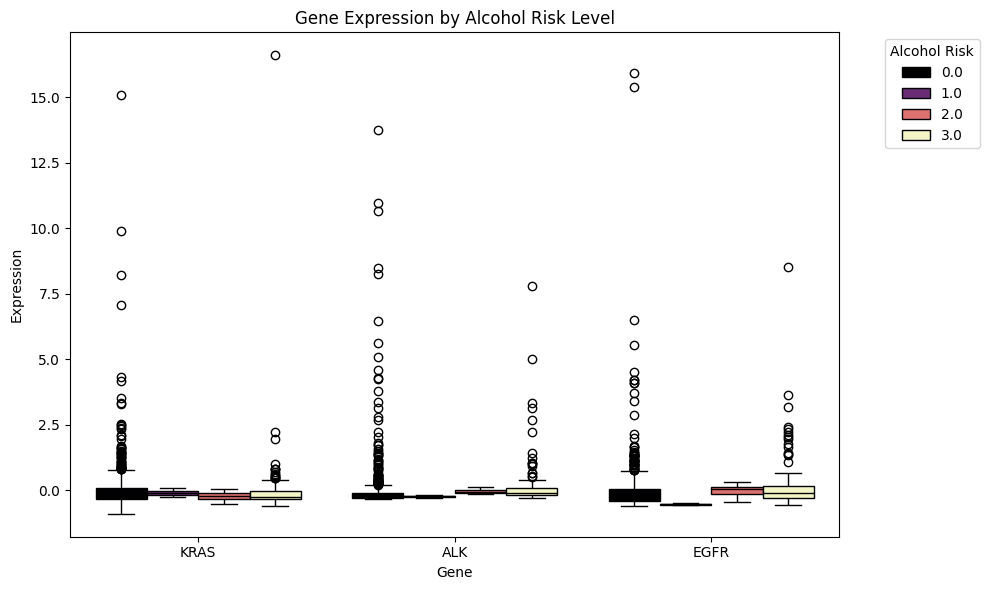

In [21]:
# Melting for alcohol
alcohol_melted = alcohol_df.melt(id_vars='alcohol_risk', value_vars=['KRAS', 'ALK', 'EGFR'],
                                  var_name='Gene', value_name='Expression')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gene', y='Expression', hue='alcohol_risk', data=alcohol_melted, palette='magma')
plt.title('Gene Expression by Alcohol Risk Level')
plt.legend(title='Alcohol Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Pairplot of Gene Expression by Tobacca and Alcohol Risk:

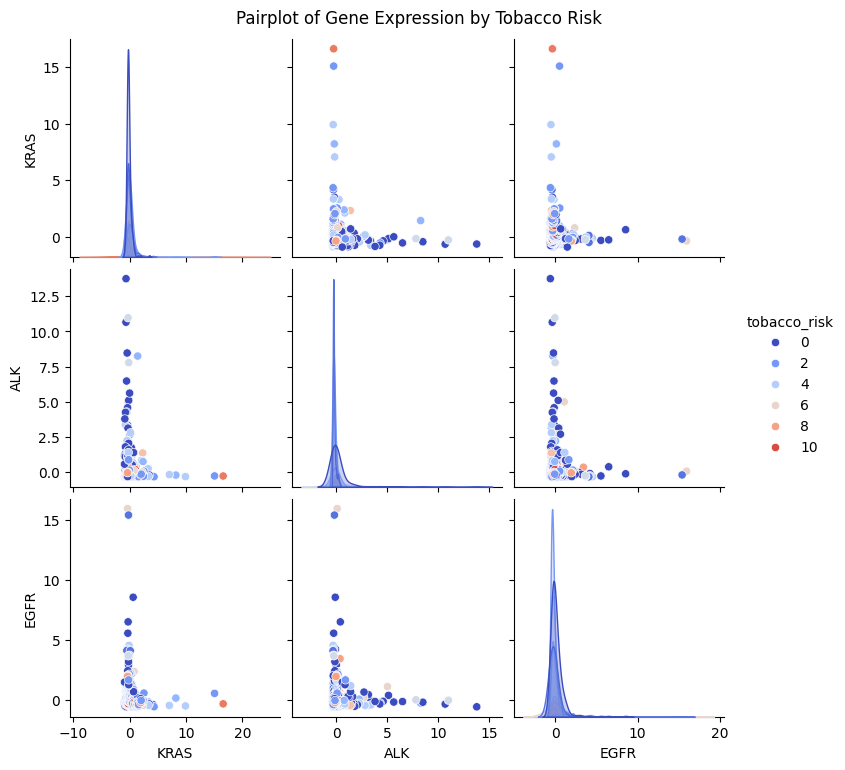

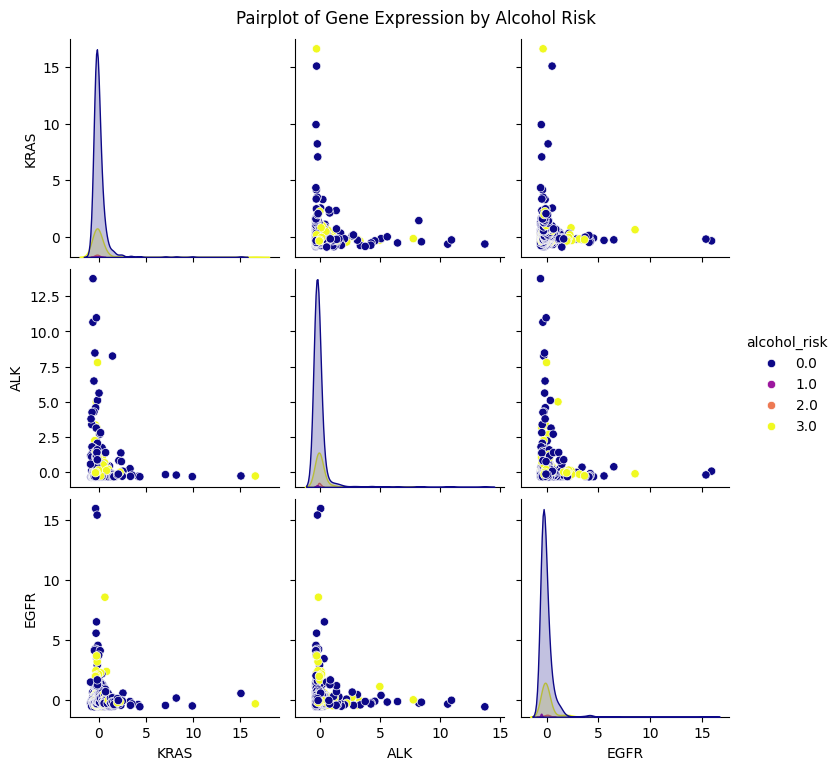

In [22]:
# Ensure risk scores are numeric
tobacco_df['tobacco_risk'] = pd.to_numeric(tobacco_df['tobacco_risk'], errors='coerce')
alcohol_df['alcohol_risk'] = pd.to_numeric(alcohol_df['alcohol_risk'], errors='coerce')

# Pairplot for gene expression colored by tobacco risk
sns.pairplot(tobacco_df[['KRAS', 'ALK', 'EGFR', 'tobacco_risk']], hue='tobacco_risk', palette="coolwarm")
plt.suptitle("Pairplot of Gene Expression by Tobacco Risk", y=1.02)
plt.show()

# Pairplot for gene expression colored by alcohol risk
sns.pairplot(alcohol_df[['KRAS', 'ALK', 'EGFR', 'alcohol_risk']], hue='alcohol_risk', palette="plasma")
plt.suptitle("Pairplot of Gene Expression by Alcohol Risk", y=1.02)
plt.show()

C:\Users\ardat\AppData\Local\Temp\ipykernel_29668\3089174570.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=tobacco_melted, x='tobacco_risk', y='Expression', hue='Gene', ci='sd')


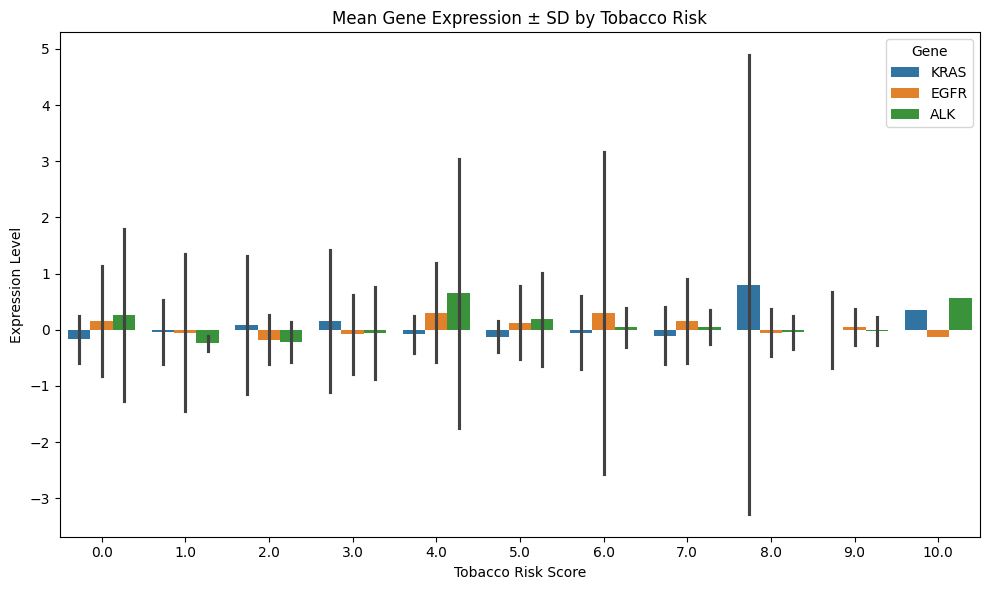

In [23]:
tobacco_melted = df_filtered.melt(id_vars='tobacco_risk', value_vars=['KRAS', 'EGFR', 'ALK'],
                                  var_name='Gene', value_name='Expression')

plt.figure(figsize=(10, 6))
sns.barplot(data=tobacco_melted, x='tobacco_risk', y='Expression', hue='Gene', ci='sd')
plt.title('Mean Gene Expression ± SD by Tobacco Risk')
plt.xlabel('Tobacco Risk Score')
plt.ylabel('Expression Level')
plt.legend(title='Gene')
plt.tight_layout()
plt.show()

C:\Users\ardat\AppData\Local\Temp\ipykernel_29668\2974603295.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=alcohol_melted, x='alcohol_risk', y='Expression', hue='Gene', ci='sd')


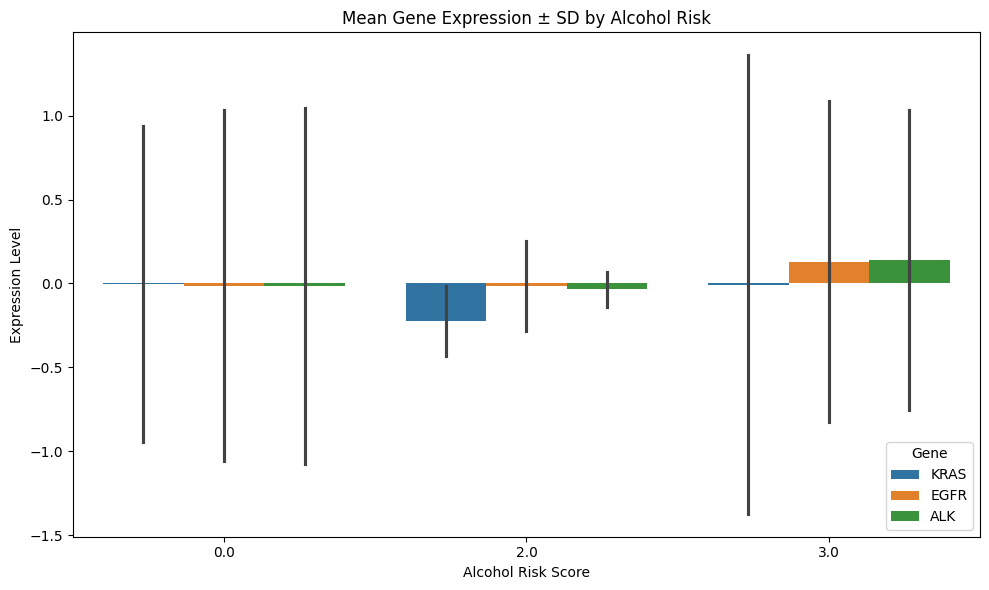

In [24]:
alcohol_melted = df_filtered.melt(id_vars='alcohol_risk', value_vars=['KRAS', 'EGFR', 'ALK'],
                                  var_name='Gene', value_name='Expression')

plt.figure(figsize=(10, 6))
sns.barplot(data=alcohol_melted, x='alcohol_risk', y='Expression', hue='Gene', ci='sd')
plt.title('Mean Gene Expression ± SD by Alcohol Risk')
plt.xlabel('Alcohol Risk Score')
plt.ylabel('Expression Level')
plt.legend(title='Gene')
plt.tight_layout()
plt.show()


# HYPOTHESIS TESTING

Null Hypothesis(H0): Tobacco and alcohol usage has no significant effect on the expression levels of lung cancer related genes KRAS, EGFR and ALK.

Alternative Hypothesis(H1): Tobacco and alcohol usage significantly influences the expression of cancer related genes KRAS, EGFR and ALK.




### One-Way ANOVA for 2 Risk Groups:

In [25]:
from scipy.stats import f_oneway

# Tobacco: test gene expression across tobacco_risk groups
def run_anova_on_gene(df, risk_col, gene):
    groups = [group[gene].dropna() for name, group in df.groupby(risk_col) if len(group[gene].dropna()) > 1]
    f_stat, p_val = f_oneway(*groups)
    print(f"{gene} vs {risk_col} ANOVA → F = {f_stat:.3f}, p = {p_val:.4f}")

# Run for all genes and both risk types
for gene in ['EGFR', 'KRAS', 'ALK']:
    run_anova_on_gene(tobacco_df, 'tobacco_risk', gene)
    run_anova_on_gene(alcohol_df, 'alcohol_risk', gene)


EGFR vs tobacco_risk ANOVA → F = 2.303, p = 0.0113
EGFR vs alcohol_risk ANOVA → F = 1.189, p = 0.3129
KRAS vs tobacco_risk ANOVA → F = 3.229, p = 0.0004
KRAS vs alcohol_risk ANOVA → F = 0.119, p = 0.9490
ALK vs tobacco_risk ANOVA → F = 5.342, p = 0.0000
ALK vs alcohol_risk ANOVA → F = 1.253, p = 0.2893


### Spearman Correlation of Genes vs. Tobacco/Alcohol Risk:

In [26]:
from scipy.stats import spearmanr

def corr_report(df, risk_col):
    print(f"\nCorrelation with {risk_col}")
    for gene in ['EGFR', 'KRAS', 'ALK']:
        corr, pval = spearmanr(df[risk_col], df[gene], nan_policy='omit')
        print(f"{gene}: Spearman r = {corr:.3f}, p = {pval:.4f}")

corr_report(tobacco_df, 'tobacco_risk')
corr_report(alcohol_df, 'alcohol_risk')



Correlation with tobacco_risk
EGFR: Spearman r = -0.043, p = 0.1792
KRAS: Spearman r = 0.085, p = 0.0069
ALK: Spearman r = 0.086, p = 0.0062

Correlation with alcohol_risk
EGFR: Spearman r = 0.125, p = 0.0001
KRAS: Spearman r = -0.033, p = 0.2926
ALK: Spearman r = 0.328, p = 0.0000


### Genes vs tobacco_risk (pairwise t-tests + Cohen's d):

In [27]:
from scipy.stats import ttest_ind
from itertools import combinations
import numpy as np

# Function for Cohen's
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*np.std(x, ddof=1)**2 + (ny - 1)*np.std(y, ddof=1)**2) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

# Function to run pairwise t-tests and compute effect sizes
def pairwise_tests(df, risk_col, gene):
    print(f"\n{gene} vs {risk_col} (pairwise t-tests + Cohen's d):")
    unique_groups = df[risk_col].dropna().unique()
    pairs = list(combinations(sorted(unique_groups), 2))
    for g1, g2 in pairs:
        x = df[df[risk_col] == g1][gene].dropna()
        y = df[df[risk_col] == g2][gene].dropna()
        if len(x) > 1 and len(y) > 1:
            t_stat, p_val = ttest_ind(x, y)
            d = cohens_d(x, y)
            print(f"{g1} vs {g2}: t = {t_stat:.3f}, p = {p_val:.4f}, Cohen's d = {d:.3f}")

for gene in ['EGFR', 'KRAS', 'ALK']:
    pairwise_tests(tobacco_df, 'tobacco_risk', gene)
    pairwise_tests(alcohol_df, 'alcohol_risk', gene)



EGFR vs tobacco_risk (pairwise t-tests + Cohen's d):
0.0 vs 1.0: t = 1.686, p = 0.0926, Cohen's d = 0.174
0.0 vs 2.0: t = 4.377, p = 0.0000, Cohen's d = 0.418
0.0 vs 3.0: t = 2.044, p = 0.0417, Cohen's d = 0.254
0.0 vs 4.0: t = 2.598, p = 0.0097, Cohen's d = 0.261
0.0 vs 5.0: t = 0.278, p = 0.7813, Cohen's d = 0.048
0.0 vs 6.0: t = -1.204, p = 0.2297, Cohen's d = -0.191
0.0 vs 7.0: t = 1.475, p = 0.1414, Cohen's d = 0.335
0.0 vs 8.0: t = 0.067, p = 0.9463, Cohen's d = 0.013
0.0 vs 9.0: t = 0.666, p = 0.5058, Cohen's d = 0.190
0.0 vs 10.0: t = 0.202, p = 0.8401, Cohen's d = 0.102
1.0 vs 2.0: t = 1.195, p = 0.2329, Cohen's d = 0.130
1.0 vs 3.0: t = 0.126, p = 0.9001, Cohen's d = 0.017
1.0 vs 4.0: t = 0.242, p = 0.8086, Cohen's d = 0.027
1.0 vs 5.0: t = -0.656, p = 0.5127, Cohen's d = -0.119
1.0 vs 6.0: t = -1.593, p = 0.1128, Cohen's d = -0.266
1.0 vs 7.0: t = 0.372, p = 0.7100, Cohen's d = 0.087
1.0 vs 8.0: t = -0.689, p = 0.4920, Cohen's d = -0.142
1.0 vs 9.0: t = -0.050, p = 0.9604, 

# Applying Machine Learning Methods On Dataset

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


## Regression model for ALK

In [333]:
# drop rows with missing values in relevant columns
df_ml = df_filtered[['tobacco_risk', 'alcohol_risk', 'ALK']].dropna()

# log transformation
df_ml['ALK_log'] = np.log1p(df_ml['ALK'])  

# features (X) and target (y)
X = df_ml[['tobacco_risk','alcohol_risk']]
y = df_ml['ALK_log']  


In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [335]:
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_cat')], errors='ignore')


In [336]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [337]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [338]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance for ALK:")
    print(f"  R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"  MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"  MSE: {mean_squared_error(y_true, y_pred):.4f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance for ALK:
  R² Score: 0.0009
  MAE: 0.2380
  MSE: 0.1442

Random Forest Performance for ALK:
  R² Score: 0.0992
  MAE: 0.2176
  MSE: 0.1301



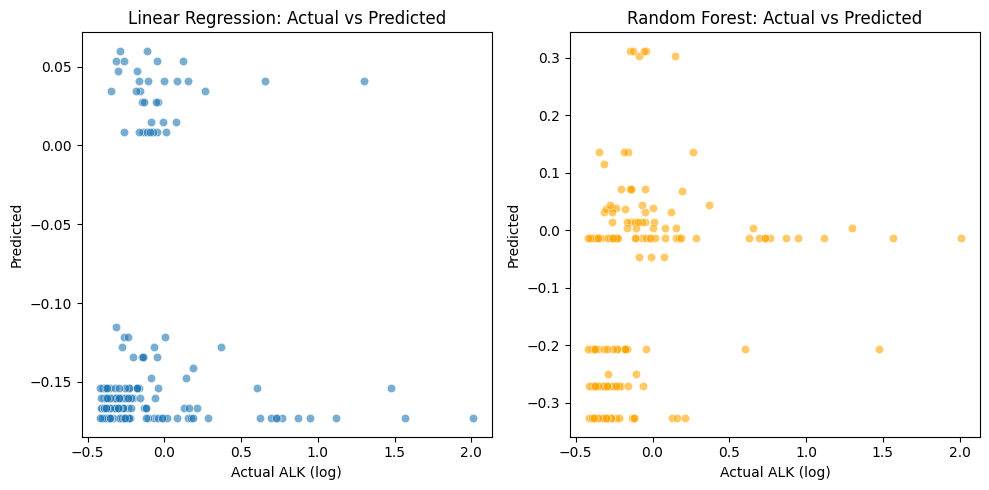

In [339]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual ALK (log)")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color="orange")
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual ALK (log)")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


## Regression Model for KRAS

In [340]:
# drop rows with missing values in relevant columns
df_ml = df_filtered[['tobacco_risk', 'alcohol_risk', 'KRAS']].dropna()

# log transformation
df_ml['KRAS_log'] = np.log1p(df_ml['KRAS'])  # log(ALK + 1) to avoid log(0)

# features (X) and target (y)
X = df_ml[['tobacco_risk', 'alcohol_risk']]
y = df_ml['KRAS_log']  


In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [342]:
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_cat')], errors='ignore')

In [343]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [344]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [345]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance for KRAS:")
    print(f"  R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"  MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"  MSE: {mean_squared_error(y_true, y_pred):.4f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance for KRAS:
  R² Score: -0.0594
  MAE: 0.3076
  MSE: 0.1625

Random Forest Performance for KRAS:
  R² Score: -0.0990
  MAE: 0.3081
  MSE: 0.1686



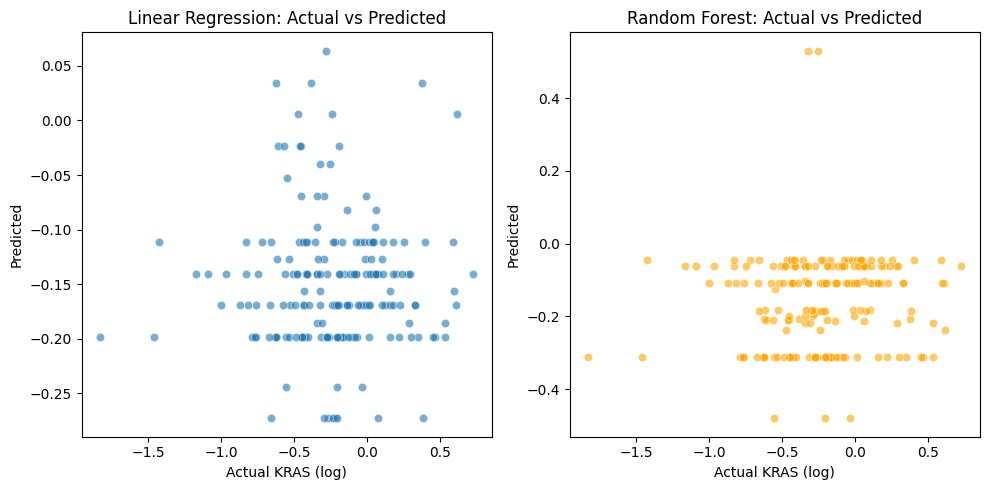

In [346]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual KRAS (log)")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color="orange")
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual KRAS (log)")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


## Regression Model for EGFR

In [347]:
# drop rows with missing values in relevant columns
df_ml = df_filtered[['tobacco_risk', 'alcohol_risk', 'EGFR']].dropna()
 # log transformation
df_ml['EGFR_log'] = np.log1p(df_ml['EGFR'])  

# Define features (X) and target (y)
X = df_ml[['tobacco_risk', 'alcohol_risk']]
y = df_ml['EGFR_log'] 


In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [349]:
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_cat')], errors='ignore')

In [350]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
def evaluate_model(name, y_true, y_pred):
    
    
    print(f"{name} Performance for EGFR:")
    print(f"  R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"  MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"  MSE: {mean_squared_error(y_true, y_pred):.4f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance for EGFR:
  R² Score: 0.0114
  MAE: 0.3560
  MSE: 0.2138

Random Forest Performance for EGFR:
  R² Score: 0.0500
  MAE: 0.3485
  MSE: 0.2055



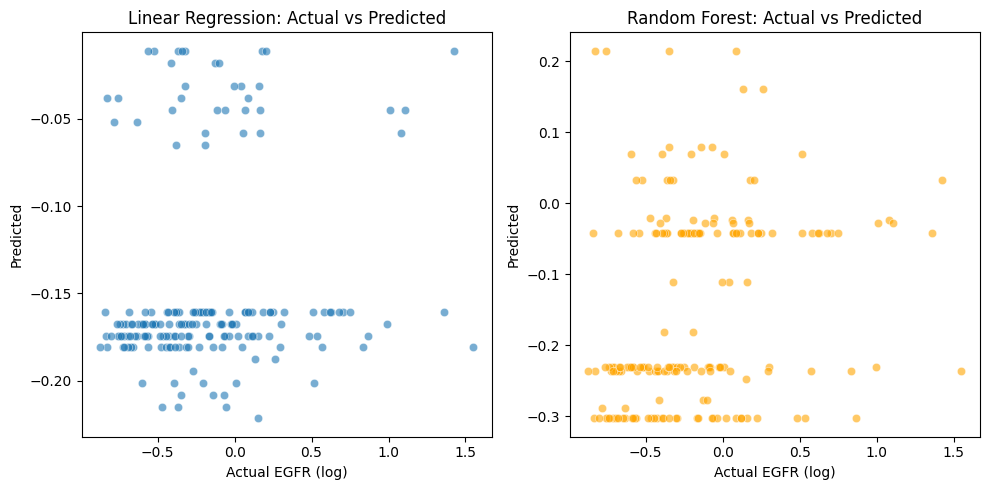

In [353]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual EGFR (log)")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)

sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color="orange")
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual EGFR (log)")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


## Binary Classification: High vs Low ALK Expression

In [354]:
# Defining high expression as above the median
alk_threshold = df_filtered['ALK'].median()

df_cls = df_filtered[['tobacco_risk', 'alcohol_risk', 'ALK']].dropna().copy()
df_cls['is_high_ALK'] = (df_cls['ALK'] > alk_threshold).astype(int)


In [355]:
X = df_cls[['tobacco_risk', 'alcohol_risk']]
y = df_cls['is_high_ALK']


In [356]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [357]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [358]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)


In [359]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classifier(name, y_true, y_pred):
    print(f"{name} Classification Report for ALK:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

evaluate_classifier("Logistic Regression", y_test, y_pred_logreg)
evaluate_classifier("Random Forest", y_test, y_pred_rfc)


Logistic Regression Classification Report for ALK:
              precision    recall  f1-score   support

           0       0.62      0.91      0.73        96
           1       0.81      0.41      0.55        92

    accuracy                           0.66       188
   macro avg       0.71      0.66      0.64       188
weighted avg       0.71      0.66      0.64       188

Confusion Matrix:
[[87  9]
 [54 38]]


Random Forest Classification Report for ALK:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        96
           1       0.74      0.73      0.74        92

    accuracy                           0.74       188
   macro avg       0.74      0.74      0.74       188
weighted avg       0.74      0.74      0.74       188

Confusion Matrix:
[[73 23]
 [25 67]]




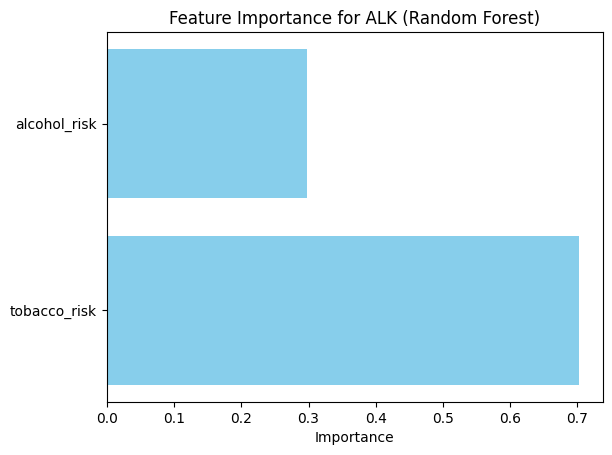

In [360]:
import matplotlib.pyplot as plt

importances = rfc.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance for ALK (Random Forest)')
plt.xlabel('Importance')
plt.show()


## Binary Classification: High vs Low KRAS Expression 

In [361]:
# Defining high expression as above the median
alk_threshold = df_filtered['KRAS'].median()

df_cls = df_filtered[['tobacco_risk', 'alcohol_risk', 'KRAS']].dropna().copy()
df_cls['is_high_KRAS'] = (df_cls['KRAS'] > alk_threshold).astype(int)


In [362]:
X = df_cls[['tobacco_risk', 'alcohol_risk']]
y = df_cls['is_high_KRAS']


In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [364]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [365]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classifier(name, y_true, y_pred):
    print(f"{name} Classification Report for KRAS:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

evaluate_classifier("Logistic Regression", y_test, y_pred_logreg)
evaluate_classifier("Random Forest", y_test, y_pred_rfc)


Logistic Regression Classification Report for KRAS:
              precision    recall  f1-score   support

           0       0.49      0.55      0.52        93
           1       0.50      0.44      0.47        95

    accuracy                           0.49       188
   macro avg       0.50      0.50      0.49       188
weighted avg       0.50      0.49      0.49       188

Confusion Matrix:
[[51 42]
 [53 42]]


Random Forest Classification Report for KRAS:
              precision    recall  f1-score   support

           0       0.43      0.45      0.44        93
           1       0.43      0.41      0.42        95

    accuracy                           0.43       188
   macro avg       0.43      0.43      0.43       188
weighted avg       0.43      0.43      0.43       188

Confusion Matrix:
[[42 51]
 [56 39]]




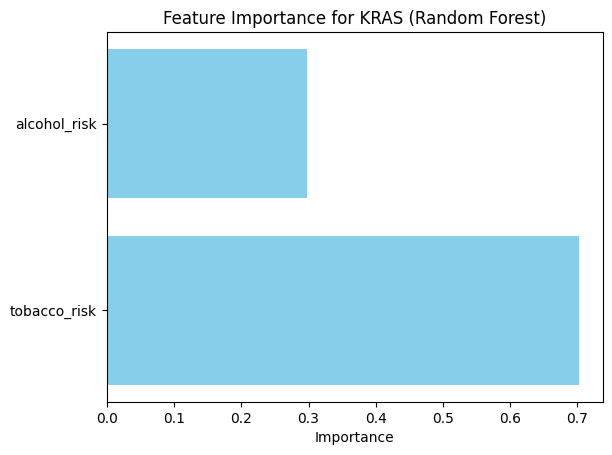

In [366]:
import matplotlib.pyplot as plt

importances = rfc.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance for KRAS (Random Forest)')
plt.xlabel('Importance')
plt.show()


## Binary Classification: High vs Low EGFR Expression 

In [367]:
# Defining high expression as above the median
alk_threshold = df_filtered['EGFR'].median()

df_cls = df_filtered[['tobacco_risk', 'alcohol_risk', 'EGFR']].dropna().copy()
df_cls['is_high_EGFR'] = (df_cls['EGFR'] > alk_threshold).astype(int)


In [368]:
X = df_cls[['tobacco_risk', 'alcohol_risk']]
y = df_cls['is_high_EGFR']


In [369]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [370]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [371]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classifier(name, y_true, y_pred):
    print(f"{name} Classification Report for EGFR:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

evaluate_classifier("Logistic Regression", y_test, y_pred_logreg)
evaluate_classifier("Random Forest", y_test, y_pred_rfc)


Logistic Regression Classification Report for EGFR:
              precision    recall  f1-score   support

           0       0.53      0.85      0.66        96
           1       0.59      0.22      0.32        92

    accuracy                           0.54       188
   macro avg       0.56      0.54      0.49       188
weighted avg       0.56      0.54      0.49       188

Confusion Matrix:
[[82 14]
 [72 20]]


Random Forest Classification Report for EGFR:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        96
           1       0.64      0.63      0.64        92

    accuracy                           0.65       188
   macro avg       0.65      0.65      0.65       188
weighted avg       0.65      0.65      0.65       188

Confusion Matrix:
[[64 32]
 [34 58]]




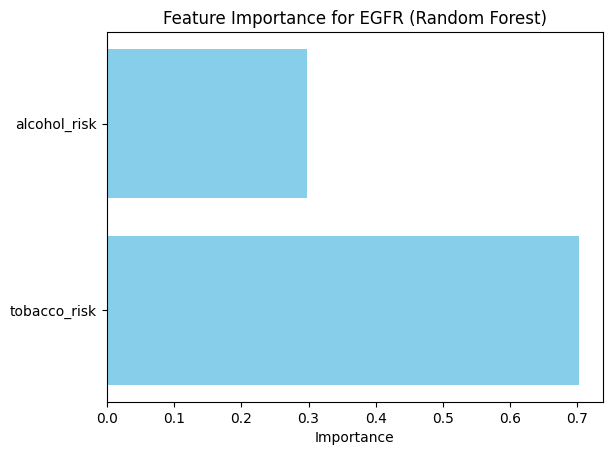

In [372]:
import matplotlib.pyplot as plt

importances = rfc.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance for EGFR (Random Forest)')
plt.xlabel('Importance')
plt.show()


## Using RandomForestClassifier to Predict Tobacco Risk from Gene Expression

In [373]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NA rows in required columns
df_rf = df_filtered[['KRAS', 'EGFR', 'ALK', 'tobacco_risk']].dropna().copy()

# Bin tobacco_risk into classes: Low (0–2), Medium (3–5), High (6–10)
df_rf['risk_class'] = pd.cut(df_rf['tobacco_risk'], 
                             bins=[-1, 2, 5, 10], 
                             labels=['Low', 'Medium', 'High'])


In [374]:
X = df_rf[['KRAS', 'EGFR', 'ALK']]
y = df_rf['risk_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)


In [375]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


Classification Report:

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        17
         Low       0.67      0.87      0.76       119
      Medium       0.36      0.23      0.28        52

    accuracy                           0.62       188
   macro avg       0.34      0.37      0.35       188
weighted avg       0.53      0.62      0.56       188

Confusion Matrix:


c:\Users\ardat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ardat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ardat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

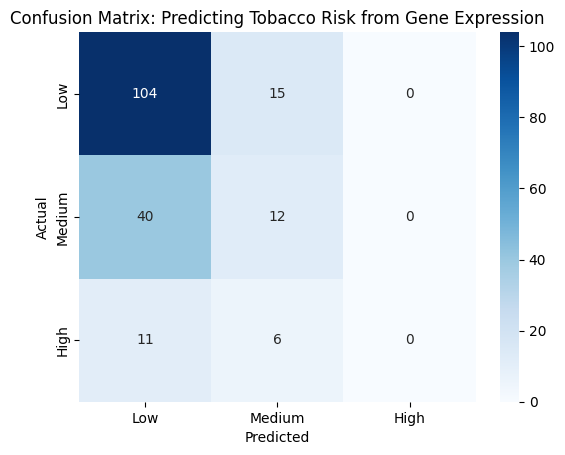

In [376]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Predicting Tobacco Risk from Gene Expression")
plt.show()


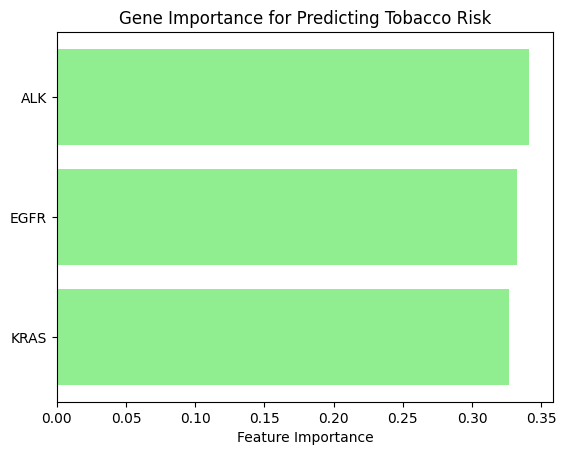

In [377]:
importances = rfc.feature_importances_
features = X.columns

plt.barh(features, importances, color='lightgreen')
plt.xlabel("Feature Importance")
plt.title("Gene Importance for Predicting Tobacco Risk")
plt.show()
